## Question 1

**Noise Reduction:**
 
**A)** Read the image 'bridge.gif'. Filter the images using the masks of of 3x3, 5x5 and 7x7. How does the size of the mask affect blurring and noise reduction? Which do you think provides a better tradeoff between blurring and noise reduction for this image?

**B)** Sharpen the 3x3 blurred image by convolving with the Laplacian mask

0 -1 0  
-1 5 -1     
0 -1 0  
Display and submit. Does this operation reduce the blurring? What about the original noise? You might need to rescale this image after convolving to make the effect more visible and to make the contrast more pleasing.

**C)** Apply a second sharpening step as in (B). Display and submit. Would repeated sharpening help image interpretation? Again, rescaling will be needed to see the effect.

<img src="./required-files/bridge.GIF" width="200" height="200"/>

In [12]:
import cv2
import matplotlib.pyplot as plt

# helper to show images side-by-side
def show_images_plt(titles, images, cmap='gray', figsize=(12,4)):
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (t, im) in enumerate(zip(titles, images), 1):
        plt.subplot(1, n, i)
        plt.imshow(im, cmap=cmap, vmin=0, vmax=255)
        plt.title(t)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
def show_images_cv2(titles, images):
    for title, img in zip(titles, images):
        cv2.imshow(title, img)
    cv2.waitKey(0)       
    cv2.destroyAllWindows()  

**A)**

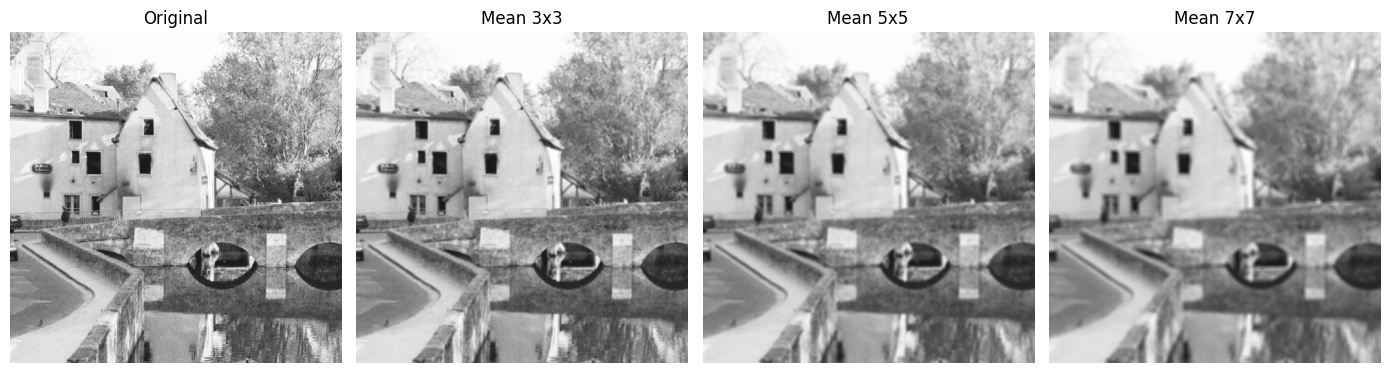

In [8]:
# Run in a Jupyter cell
import cv2
import numpy as np


# load image (grayscale)
img = cv2.imread('./required-files/bridge.GIF', cv2.IMREAD_GRAYSCALE)

# create averaging kernels
k3 = np.ones((3,3), dtype=np.float32) / 9.0
k5 = np.ones((5,5), dtype=np.float32) / 25.0
k7 = np.ones((7,7), dtype=np.float32) / 49.0

blur3 = cv2.filter2D(img, -1, k3)
blur5 = cv2.filter2D(img, -1, k5)
blur7 = cv2.filter2D(img, -1, k7)

show_images_plt(
    ['Original', 'Mean 3x3', 'Mean 5x5', 'Mean 7x7'],
    [img, blur3, blur5, blur7],
    figsize=(14,4)
)

show_images_cv2(
    ['Original', 'Mean 3x3', 'Mean 5x5', 'Mean 7x7'],
    [img, blur3, blur5, blur7]
)


**Conceptual Answer**

* **How mask size affects blurring and noise reduction:** larger averaging masks increase the amount of blur and therefore remove more high-frequency components (including noise). So noise reduction increases with mask size, but so does loss of detail / edge blurring.
* **Tradeoff (which is better for this image):** usually **5×5** is a practical compromise for images with moderate noise — it reduces noise noticeably while preserving more structure than 7×7. However, the "best" depends on the noise level and how important fine detail is: if tiny details are critical, prefer 3×3 or a median filter; if noise is heavy and details are less important, 7×7 may be acceptable.

> Note: **median filter** often preserves edges better while removing impulse noise. If the image has salt-and-pepper noise, we can try `cv2.medianBlur(img, 3)` and compare.


**B)**

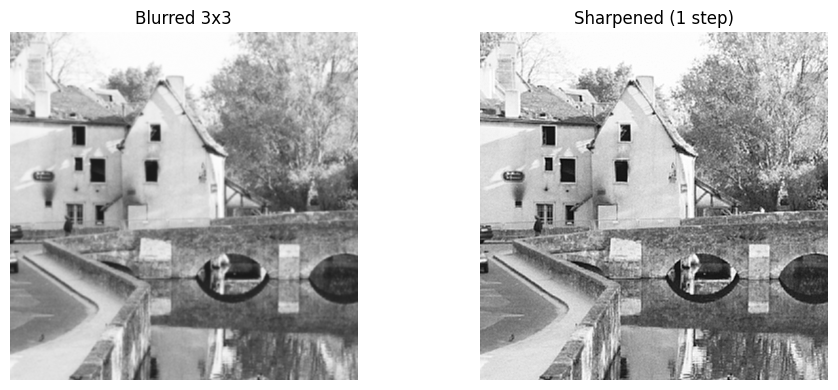

In [10]:

laplacian_mask = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

# Sharpen the 3x3 blurred image
sharpen1 = cv2.filter2D(blur3, -1, laplacian_mask)

# Normalize (optional but recommended for better contrast)
sharpen1_norm = cv2.normalize(sharpen1, None, 0, 255, cv2.NORM_MINMAX)

# Show result
show_images_plt(
    ['Blurred 3x3', 'Sharpened (1 step)'],
    [blur3, sharpen1_norm],
    figsize=(10,4)
)
show_images_cv2(
    ['Blurred 3x3', 'Sharpened (1 step)'],
    [blur3, sharpen1_norm],
)

**Conceptual Answer**

**Does sharpening reduce the blurring?**
Yes. The Laplacian sharpening mask increases edge contrast, making details look sharper and reducing the soft appearance created by the 3×3 averaging filter.

**What about the original noise?**
Some noise reappears, because sharpening amplifies high-frequency components (both edges and noise).
However, since the image was blurred first, the noise is not amplified too severely.

**Why is rescaling needed?**
Convolution can produce intensity values outside the range 0–255.
Rescaling improves contrast and makes the sharpened effect visible.


**C)**

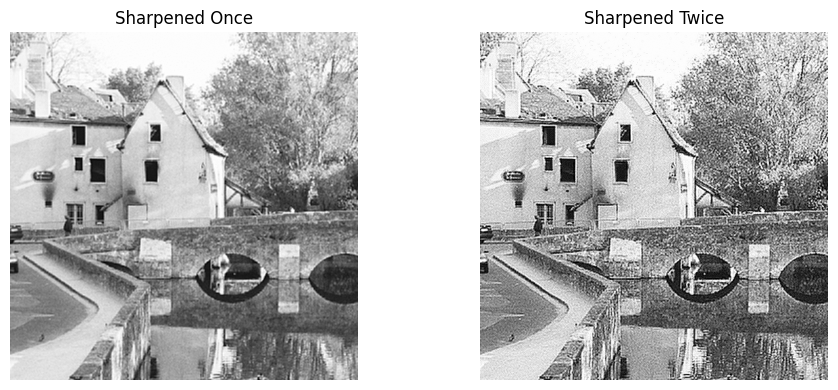

In [11]:
# Apply second sharpening
sharpen2 = cv2.filter2D(sharpen1_norm, -1, laplacian_mask)

# Normalize again for visibility
sharpen2_norm = cv2.normalize(sharpen2, None, 0, 255, cv2.NORM_MINMAX)

# Display
show_images_plt(
    ['Sharpened Once', 'Sharpened Twice'],
    [sharpen1_norm, sharpen2_norm],
    figsize=(10,4)
)
show_images_cv2(
    ['Sharpened Once', 'Sharpened Twice'],
    [sharpen1_norm, sharpen2_norm],
)


**Conceptual Answer**

**Would repeated sharpening help image interpretation?**
**Generally no.** Applying the sharpening filter a second time makes the edges appear unnaturally strong and significantly amplifies noise. Instead of improving clarity, the image begins to look artificially enhanced, grainy, and harder to interpret.

**Why?**

* The Laplacian mask boosts high-frequency components
* On the second pass, it amplifies:

  * already-amplified edges
  * noise introduced in the first sharpening
* This leads to:

  * halo artifacts
  * exaggerated edges
  * loss of natural appearance


## Question 2

Noise reduction is a crucial task to enhance the quality of images. You are provided with a noisy grayscale image, 'brain.png,' and your task is to apply noise reduction using two different methods: Median Filtering and Averaging Filtering.

**A)** Describe each of the two methods for noise reduction in images. Explain how they work and their key characteristics in addressing noise.

**B)** Apply noise reduction to the 'brain.png' image using Averaging Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and determine which kernel size offers a better trade-off between blurring and noise reduction for this image.

**C)** Apply noise reduction on the 'brain.png' image using Median Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and compare their results together in a single figure. Based on your observations, which kernel size do you think is better for noise reduction in this image?

**D)** For each of the two methods, discuss their advantages and disadvantages in the context of noise reduction. Consider aspects such as noise removal effectiveness, preservation of image details.

<img src="./required-files/brain.png" width="200" height="200"/>

## Question 3

The Laplacian and Sobel operators are used for edge detection, the Laplacian operator focuses on second-order derivatives to identify rapid changes in intensity, while the Sobel operator is specifically designed for computing the gradient magnitude, emphasizing edges along the horizontal and vertical directions.

**A)** When would it be more advantageous to employ Sobel edge detection versus Laplacian edge detection in image processing applications?

**B)** Open the image 'Edge.jpg,' apply the Sobel edge detector separately along the x and y dimensions, and then visualize the results for each dimension as well as the combined effect.

**C)** Open the image 'Edge.jpg,' apply the Laplacian edge detector, and display the results for Edge Detection and Magnitude.

**D)** Examine the results of these two methods and figure out which one works better for this task.

<img src="./required-files/Edge.jpg" width="200" height="200"/>

## Question 4

In this question, you will explore the Robert-Cross and Prewitt operators, compare their results, and then apply a high-boost filter to undo their effects. Use the image below for this question.

**A)** Briefly explain how Roberts cross-gradient operator works and then apply it on the given image and display the result.

**B)** Briefly explain how Prewitt operator works and then apply it to the given image and display the result.

**C)** Display the original image, the results of the Robert-Cross operator, and the results of the Prewitt operator side by side. 

**D)** Apply a high-boost filter to the images obtained after the Robert-Cross and Prewitt operators. Experiment with different values of 'A' and observe the changes.

**E)** Write a brief discussion on the differences observed between the results of the Roberts cross-gradient and Prewitt operators. Explain how the high-boost filter affects the results of these operators and the significance of the chosen value of ‘A’.

<img src="./required-files/cat.gif" width="200" height="200"/>

## Question 5

To achieve successful image enhancement, it is often ineffective to rely on a single operation. Instead, a combination of techniques is utilized to attain the desired final result. Please open the image 'skeleton.png' and apply the enhancement methods you have already learned, incorporating spatial enhancement techniques.

**A)** Open the image 'skeleton.png,' apply your desired enhancement methods to achieve the best visibility of the bones. Explain your methods and why you chose them.

**B)** Compare the original image with your enhanced version in a single figure, illustrating them before and after enhancement.

<img src="./required-files/skeleton.png" width="200" height="200"/>